# LetsGrowMore - SEPTEMBER 2021 - SAMARTH P SHET


## Data Science Internship

# Iris Flowers Classification ML Project

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Datasetlink : http://archive.ics.uci.edu/ml/dataset

We'll use the ```Iris Data Set dataset from the UCI Machine Learning Repository```. The structure of this notebook is as follows:

First, we will start off by loading and viewing the dataset.

We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.

We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
After our data is in good shape, we will do some exploratory data analysis to build our intuitions.
Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.

First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.

### Importing the required libraries!!

In [1]:
# importing the libraries related to the data manipulation.
import numpy as np
import pandas as pd

# importing the libraries related to the data_visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###  Loading the dataset

Loading the dataset, "datasets/iris.data", into a pandas DataFrame called iris, Setting the header argument to None.


In [2]:
# data path =  E:\DOWNLOADS\iris.csv
iris = pd.read_csv(r'E:\DOWNLOADS\iris.csv', header = None)

In [3]:
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.shape

(150, 5)

As we can see the data above,
It contains ```150 rows``` and ```5 coulmns```

In [5]:
#Use the info() method of iris to get more information about the DataFrame.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As we can see that there ```150 non-null values``` in all the four columns of the dataset.

In [6]:
# Inspect missing values in the dataset
iris.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

As we can see there no null values in the dataset

In [7]:
iris.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# Renaming the Column name for the further reference:
iris0 = iris.rename(columns = { 0 : 'SepalLength'}, inplace = True)
iris1 = iris.rename(columns = { 1 : 'SepalWidth'}, inplace = True)
iris2 = iris.rename(columns = { 2 : 'PetalLength'}, inplace = True)
iris3 = iris.rename(columns = { 3 : 'PetalWidth'}, inplace = True)
iris4 = iris.rename(columns = { 4 : 'Species'}, inplace = True)

In [14]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


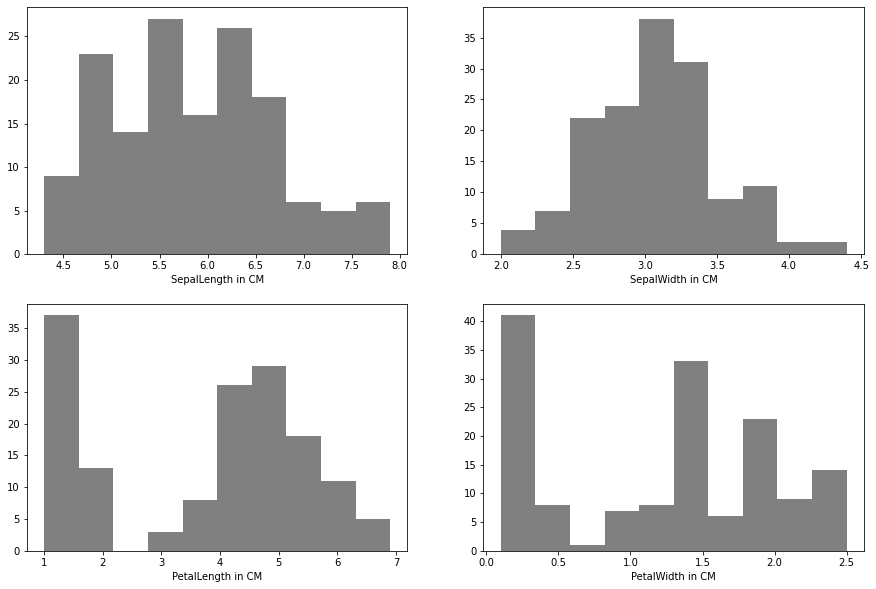

In [22]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Price
ax1.hist(iris['SepalLength'], color = 'grey')
ax1.set_xlabel('SepalLength in CM')

# Open
ax2.hist(iris['SepalWidth'], color = 'grey')
ax2.set_xlabel('SepalWidth in CM')

# High
ax3.hist(iris['PetalLength'], color = 'grey')
ax3.set_xlabel('PetalLength in CM')

# low
ax4.hist(iris['PetalWidth'], color = 'grey')
ax4.set_xlabel('PetalWidth in CM')

fig.set_figheight(10)
fig.set_figwidth(15)

plt.show()

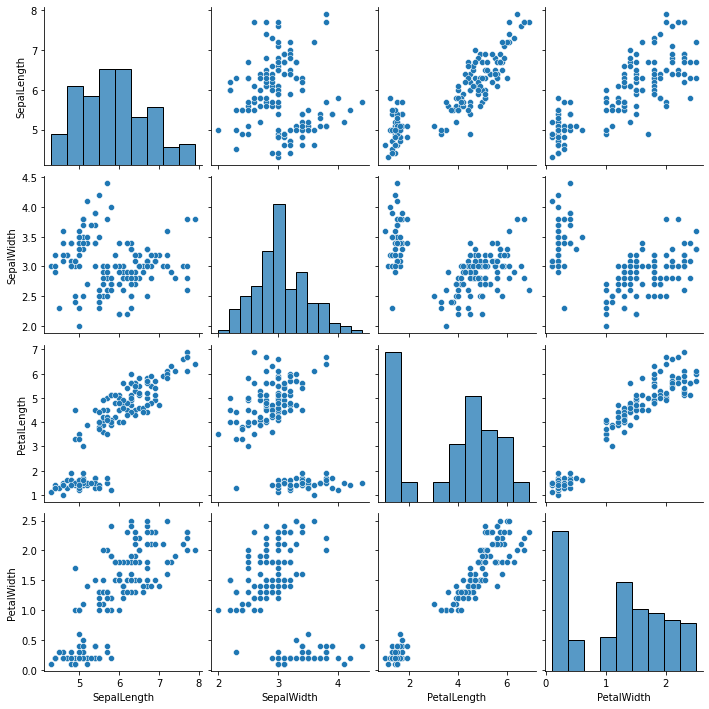

In [27]:
sns.pairplot(data=iris,kind='scatter')

The above graph gives detailed explanation how each coloumns are related ith each other and the type of species

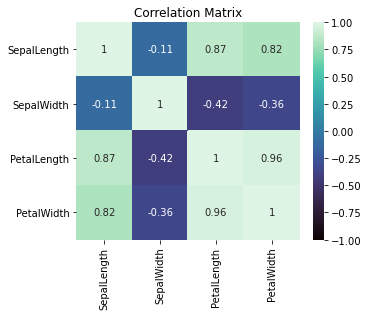

In [28]:
corr = iris.corr()
plt.figure(figsize = (5,4))
sns.heatmap(corr, annot =True, vmin = -1.0, cmap = 'mako')
plt.title('Correlation Matrix')
plt.show()

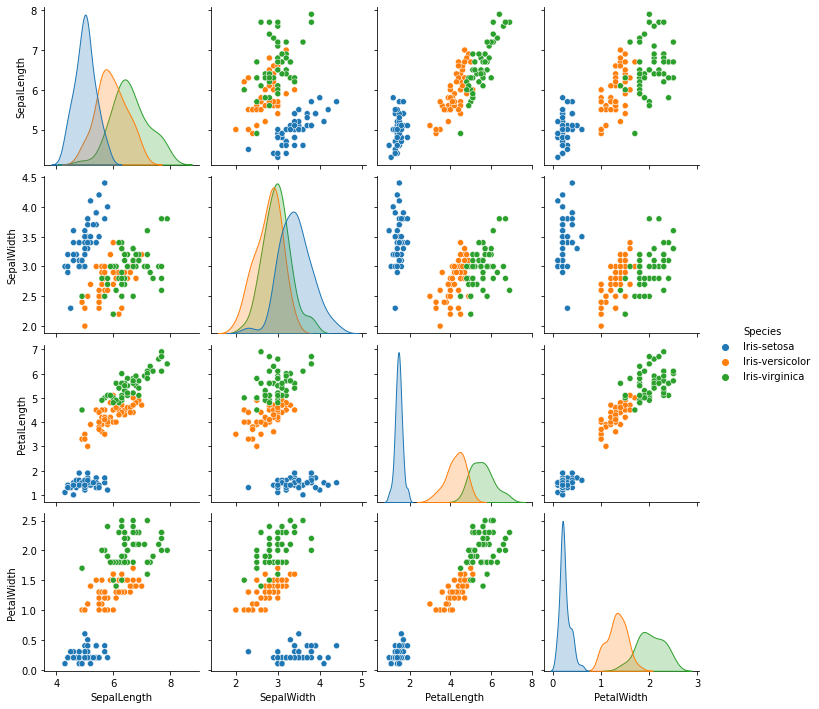

In [33]:
sns.pairplot(data=iris,hue='Species')

In [34]:
from sklearn.cluster import KMeans
LIST= []
x = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',]].to_numpy()
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    LIST.append(kmeans.inertia_)

C:\Users\SAMARTH P SHET\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### From the above graph we can see that the graph have an elbow shape at 3 which means the k value that should be choosen is 3.it also known that the optimum cluster occur at the elbow curve

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

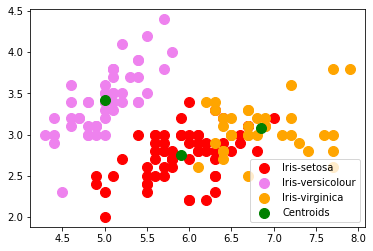

In [40]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'violet', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

### Thank you!!